In [1]:
import pandas as pd
import random
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D

## 전처리 전

In [2]:
df = pd.read_csv('P_ind추가한데이터셋/0_00.csv').iloc[:, 3:]
df.head()

,NOSE_x,NOSE_y,NOSE_z,LEFT_EYE_INNER_x,LEFT_EYE_INNER_y,LEFT_EYE_INNER_z,LEFT_EYE_x,LEFT_EYE_y,LEFT_EYE_z,LEFT_EYE_OUTER_x,...,RIGHT_HEEL_x,RIGHT_HEEL_y,RIGHT_HEEL_z,LEFT_FOOT_INDEX_x,LEFT_FOOT_INDEX_y,LEFT_FOOT_INDEX_z,RIGHT_FOOT_INDEX_x,RIGHT_FOOT_INDEX_y,RIGHT_FOOT_INDEX_z,position_state
0,0.45,0.46,-0.17,0.46,0.44,-0.14,0.47,0.44,-0.14,0.47,...,0.4,0.86,-0.40,0.58,0.89,-0.63,0.31,0.90,-0.58,0.0
1,0.45,0.46,-0.23,0.46,0.45,-0.21,0.47,0.44,-0.21,0.47,...,0.4,0.86,-0.47,0.58,0.89,-0.71,0.31,0.89,-0.66,0.0
2,0.45,0.46,-0.30,0.46,0.45,-0.28,0.47,0.44,-0.28,0.47,...,0.4,0.86,-0.47,0.57,0.89,-0.75,0.31,0.89,-0.67,0.0
3,0.45,0.46,-0.35,0.46,0.45,-0.33,0.47,0.45,-0.33,0.47,...,0.4,0.86,-0.52,0.57,0.89,-0.83,0.31,0.89,-0.73,0.0
4,0.45,0.46,-0.34,0.46,0.45,-0.32,0.47,0.45,-0.32,0.47,...,0.4,0.86,-0.50,0.57,0.89,-0.80,0.31,0.89,-0.71,0.0


In [3]:
df.shape

(3722, 100)

In [4]:
num=200
# num = random.randint(0, 50)
print(num)

df_x = df.filter(regex='_x').iloc[num, :]
df_y = df.filter(regex='_y').iloc[num, :]
df_z = df.filter(regex='_z').iloc[num, :]
df_x.shape, df_y.shape, df_z.shape

200


((33,), (33,), (33,))

In [5]:
df_x_s = pd.DataFrame(df_x.values, columns=[0])
df_y_s = pd.DataFrame(df_y.values, columns=[1])
df_z_s = pd.DataFrame(df_z.values, columns=[2])
df_x_s.shape, df_y_s.shape

((33, 1), (33, 1))

In [6]:
df_x_y = pd.concat([df_x_s, df_y_s], axis=1)
np.ndarray(df_x_y)
df_x_y.shape

(33, 2)

In [7]:
df_left_eyes= pd.concat([df_x_y.iloc[:1,:], df_x_y.iloc[1:4,:],df_x_y.iloc[7:8,:]])
df_right_eyes= pd.concat([df_x_y.iloc[:1,:], df_x_y.iloc[4:7,:],df_x_y.iloc[8:9,:]])

df_left_hand= pd.concat([df_x_y.iloc[15:16,:], df_x_y.iloc[21:22,:]])
df_right_hand= pd.concat([df_x_y.iloc[16:17,:], df_x_y.iloc[22:23,:]])

df_left_arm = pd.concat([df_x_y.iloc[11:12,:],df_x_y.iloc[13:14,:],df_x_y.iloc[15:16,:],df_x_y.iloc[17:18,:],df_x_y.iloc[19:20,:]])
df_right_arm = pd.concat([df_x_y.iloc[12:13,:],df_x_y.iloc[14:15,:],df_x_y.iloc[16:17,:],df_x_y.iloc[18:19,:],df_x_y.iloc[20:21,:]])

df_left_leg = pd.concat([df_x_y.iloc[23:24,:],df_x_y.iloc[25:26,:],df_x_y.iloc[27:28,:],df_x_y.iloc[29:30,:],df_x_y.iloc[31:32,:]])
df_right_leg = pd.concat([df_x_y.iloc[24:25,:],df_x_y.iloc[26:27,:],df_x_y.iloc[28:29,:],df_x_y.iloc[30:31,:],df_x_y.iloc[32:,:]])

df_left_shoulder= pd.concat([df_x_y.iloc[11:12,:],df_x_y.iloc[23:24,:]])
df_right_shoulder= pd.concat([df_x_y.iloc[12:13,:],df_x_y.iloc[24:25,:]])

df_left_foot= pd.concat([df_x_y.iloc[27:28,:],df_x_y.iloc[31:32,:]])
df_right_foot= pd.concat([df_x_y.iloc[28:29,:],df_x_y.iloc[32:,:]])

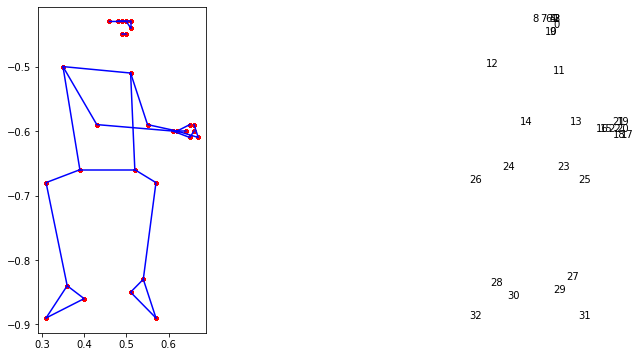

In [8]:
fig = plt.figure(figsize=(3, 6))

#plt.ylim(1,0)
#plt.xlim(0,1)

plt.plot(df_left_eyes.iloc[:,0], -df_left_eyes.iloc[:, 1], color='b',zorder=2) #left eyes
plt.plot(df_right_eyes.iloc[:,0], -df_right_eyes.iloc[:, 1], color='b',zorder=2) #right eyes

plt.plot(df_x_y.iloc[9:11,0], -df_x_y.iloc[9:11,1], color='b',zorder=2) #mouth

plt.plot(df_left_hand.iloc[:,0], -df_left_hand.iloc[:,1], color='b',zorder=2) #left hand
plt.plot(df_right_hand.iloc[:,0], -df_right_hand.iloc[:,1], color='b',zorder=2) #right hand

plt.plot(df_left_arm.iloc[:,0], -df_left_arm.iloc[:,1], color='b',zorder=2) #left arm
plt.plot(df_right_arm.iloc[:,0], -df_right_arm.iloc[:,1], color='b',zorder=2) #right arm

plt.plot(df_x_y.iloc[11:13,0], -df_x_y.iloc[11:13,1], color='b',zorder=2) #shoulder
plt.plot(df_left_shoulder.iloc[:,0], -df_left_shoulder.iloc[:,1], color='b',zorder=2) #left shoulder
plt.plot(df_right_shoulder.iloc[:,0], -df_right_shoulder.iloc[:,1], color='b',zorder=2) #right shoulder

plt.plot(df_x_y.iloc[23:25,0], -df_x_y.iloc[23:25,1], color='b',zorder=2) #hip

plt.plot(df_left_leg.iloc[:,0], -df_left_leg.iloc[:,1], color='b',zorder=2) #left leg
plt.plot(df_right_leg.iloc[:,0], -df_right_leg.iloc[:,1], color='b',zorder=2) #right leg

plt.plot(df_left_foot.iloc[:,0], -df_left_foot.iloc[:,1], color='b',zorder=2) #left foot
plt.plot(df_right_foot.iloc[:,0], -df_right_foot.iloc[:,1], color='b',zorder=2) #right foot


for i in range(df_x_y.shape[0]):
    plt.scatter(df_x_y.iloc[:, 0], -df_x_y.iloc[:, 1], alpha=0.8, color='red', s=8)
    plt.text(df_x_y.iloc[i,0]+1, -df_x_y.iloc[i,1], str(i), size=10)
    
plt.show()

## 전처리 후

In [9]:
df = pd.read_csv('Total_dataset/total_dataset(rescaling)(2).csv').iloc[:, 2:]
df.head()

,NOSE_x,NOSE_y,NOSE_z,LEFT_EYE_INNER_x,LEFT_EYE_INNER_y,LEFT_EYE_INNER_z,LEFT_EYE_x,LEFT_EYE_y,LEFT_EYE_z,LEFT_EYE_OUTER_x,...,RIGHT_HEEL_x,RIGHT_HEEL_y,RIGHT_HEEL_z,LEFT_FOOT_INDEX_x,LEFT_FOOT_INDEX_y,LEFT_FOOT_INDEX_z,RIGHT_FOOT_INDEX_x,RIGHT_FOOT_INDEX_y,RIGHT_FOOT_INDEX_z,position_state
0,0.428571,0.330097,0.586895,0.43956,0.310680,0.595442,0.450549,0.310680,0.595442,0.450549,...,0.373626,0.718447,0.521368,0.571429,0.747573,0.455840,0.274725,0.757282,0.470085,0.0
1,0.428571,0.330097,0.569801,0.43956,0.320388,0.575499,0.450549,0.310680,0.575499,0.450549,...,0.373626,0.718447,0.501425,0.571429,0.747573,0.433048,0.274725,0.747573,0.447293,0.0
2,0.428571,0.330097,0.549858,0.43956,0.320388,0.555556,0.450549,0.310680,0.555556,0.450549,...,0.373626,0.718447,0.501425,0.560440,0.747573,0.421652,0.274725,0.747573,0.444444,0.0
3,0.428571,0.330097,0.535613,0.43956,0.320388,0.541311,0.450549,0.320388,0.541311,0.450549,...,0.373626,0.718447,0.487179,0.560440,0.747573,0.398860,0.274725,0.747573,0.427350,0.0
4,0.428571,0.330097,0.538462,0.43956,0.320388,0.544160,0.450549,0.320388,0.544160,0.450549,...,0.373626,0.718447,0.492877,0.560440,0.747573,0.407407,0.274725,0.747573,0.433048,0.0


In [10]:
df.shape

(86366, 100)

In [11]:
position_0=80941

position_1=80959

# num = random.randint(0, 50)
print(num)

df_x_0 = df.filter(regex='_x').iloc[position_0, :]
df_y_0 = df.filter(regex='_y').iloc[position_0, :]
df_z_0 = df.filter(regex='_z').iloc[position_0, :]

df_x_1 = df.filter(regex='_x').iloc[position_1, :]
df_y_1 = df.filter(regex='_y').iloc[position_1, :]
df_z_1 = df.filter(regex='_z').iloc[position_1, :]

df_x_0.shape, df_y_0.shape, df_z_0.shape, df_x_1.shape, df_y_1.shape, df_z_1.shape

200


((33,), (33,), (33,), (33,), (33,), (33,))

In [12]:
df_x_s_0 = pd.DataFrame(df_x_0.values, columns=[0])
df_y_s_0 = pd.DataFrame(df_y_0.values, columns=[1])
df_z_s_0 = pd.DataFrame(df_z_0.values, columns=[2])

df_x_s_1 = pd.DataFrame(df_x_1.values, columns=[0])
df_y_s_1 = pd.DataFrame(df_y_1.values, columns=[1])
df_z_s_1 = pd.DataFrame(df_z_1.values, columns=[2])

df_x_s_0.shape, df_y_s_0.shape, df_x_s_1.shape, df_y_s_1.shape

((33, 1), (33, 1), (33, 1), (33, 1))

In [13]:
df_x_y_0 = pd.concat([df_x_s_0, df_y_s_0], axis=1)
np.ndarray(df_x_y_0)

df_x_y_1 = pd.concat([df_x_s_1, df_y_s_1], axis=1)
np.ndarray(df_x_y_1)

df_x_y_0.shape, df_x_y_1.shape

((33, 2), (33, 2))

In [14]:
#position=0
df_left_eyes_0= pd.concat([df_x_y_0.iloc[:1,:], df_x_y_0.iloc[1:4,:],df_x_y_0.iloc[7:8,:]])
df_right_eyes_0= pd.concat([df_x_y_0.iloc[:1,:], df_x_y_0.iloc[4:7,:],df_x_y_0.iloc[8:9,:]])

df_left_hand_0= pd.concat([df_x_y_0.iloc[15:16,:], df_x_y_0.iloc[21:22,:]])
df_right_hand_0= pd.concat([df_x_y_0.iloc[16:17,:], df_x_y_0.iloc[22:23,:]])

df_left_arm_0 = pd.concat([df_x_y_0.iloc[11:12,:],df_x_y_0.iloc[13:14,:],df_x_y_0.iloc[15:16,:],df_x_y_0.iloc[17:18,:],df_x_y_0.iloc[19:20,:]])
df_right_arm_0 = pd.concat([df_x_y_0.iloc[12:13,:],df_x_y_0.iloc[14:15,:],df_x_y_0.iloc[16:17,:],df_x_y_0.iloc[18:19,:],df_x_y_0.iloc[20:21,:]])

df_left_leg_0 = pd.concat([df_x_y_0.iloc[23:24,:],df_x_y_0.iloc[25:26,:],df_x_y_0.iloc[27:28,:],df_x_y_0.iloc[29:30,:],df_x_y_0.iloc[31:32,:]])
df_right_leg_0 = pd.concat([df_x_y_0.iloc[24:25,:],df_x_y_0.iloc[26:27,:],df_x_y_0.iloc[28:29,:],df_x_y_0.iloc[30:31,:],df_x_y_0.iloc[32:,:]])

df_left_shoulder_0= pd.concat([df_x_y_0.iloc[11:12,:],df_x_y_0.iloc[23:24,:]])
df_right_shoulder_0= pd.concat([df_x_y_0.iloc[12:13,:],df_x_y_0.iloc[24:25,:]])

df_left_foot_0= pd.concat([df_x_y_0.iloc[27:28,:],df_x_y_0.iloc[31:32,:]])
df_right_foot_0= pd.concat([df_x_y_0.iloc[28:29,:],df_x_y_0.iloc[32:,:]])


#position=1
df_left_eyes_1= pd.concat([df_x_y_1.iloc[:1,:], df_x_y_1.iloc[1:4,:],df_x_y_1.iloc[7:8,:]])
df_right_eyes_1= pd.concat([df_x_y_1.iloc[:1,:], df_x_y_1.iloc[4:7,:],df_x_y_1.iloc[8:9,:]])

df_left_hand_1= pd.concat([df_x_y_1.iloc[15:16,:], df_x_y_1.iloc[21:22,:]])
df_right_hand_1= pd.concat([df_x_y_1.iloc[16:17,:], df_x_y_1.iloc[22:23,:]])

df_left_arm_1 = pd.concat([df_x_y_1.iloc[11:12,:],df_x_y_1.iloc[13:14,:],df_x_y_1.iloc[15:16,:],df_x_y_1.iloc[17:18,:],df_x_y_1.iloc[19:20,:]])
df_right_arm_1 = pd.concat([df_x_y_1.iloc[12:13,:],df_x_y_1.iloc[14:15,:],df_x_y_1.iloc[16:17,:],df_x_y_1.iloc[18:19,:],df_x_y_1.iloc[20:21,:]])

df_left_leg_1 = pd.concat([df_x_y_1.iloc[23:24,:],df_x_y_1.iloc[25:26,:],df_x_y_1.iloc[27:28,:],df_x_y_1.iloc[29:30,:],df_x_y_1.iloc[31:32,:]])
df_right_leg_1 = pd.concat([df_x_y_1.iloc[24:25,:],df_x_y_1.iloc[26:27,:],df_x_y_1.iloc[28:29,:],df_x_y_1.iloc[30:31,:],df_x_y_1.iloc[32:,:]])

df_left_shoulder_1= pd.concat([df_x_y_1.iloc[11:12,:],df_x_y_1.iloc[23:24,:]])
df_right_shoulder_1= pd.concat([df_x_y_1.iloc[12:13,:],df_x_y_1.iloc[24:25,:]])

df_left_foot_1= pd.concat([df_x_y_1.iloc[27:28,:],df_x_y_1.iloc[31:32,:]])
df_right_foot_1= pd.concat([df_x_y_1.iloc[28:29,:],df_x_y_1.iloc[32:,:]])

In [15]:
x_hand_0 = ([df_x_y_0.iloc[15:16,:1], df_x_y_0.iloc[21:22,:1]])
y_hand_0 = ([df_x_y_0.iloc[15:16,1:], df_x_y_0.iloc[21:22,1:]])

x_hand_0_min = (x_hand_0[0].values+x_hand_0[1].values)/len(x_hand_0)
y_hand_0_min = (y_hand_0[0].values+y_hand_0[1].values)/len(y_hand_0)

hand_0_min = (x_hand_0_min[0][0], y_hand_0_min[0][0])
print('position 0 x좌표 평균: ', x_hand_0_min, 'position 0 y좌표 평균: ', y_hand_0_min)


x_hand_1 = ([df_x_y_1.iloc[15:16,:1], df_x_y_1.iloc[21:22,:1]])
y_hand_1 = ([df_x_y_1.iloc[15:16,1:], df_x_y_1.iloc[21:22,1:]])

x_hand_1_min = (x_hand_1[0].values+x_hand_1[1].values)/len(x_hand_1)
y_hand_1_min = (y_hand_1[0].values+y_hand_1[1].values)/len(y_hand_1)

hand_1_min = (x_hand_1_min[0][0], y_hand_1_min[0][0])
print('position 1 x좌표 평균: ', x_hand_1_min, 'position 1 y좌표 평균: ', y_hand_1_min)

print('position 0 좌표 평균: ', hand_0_min)
print('position 1 좌표 평균: ', hand_1_min)

x_hand = (hand_0_min[0], hand_1_min[0])
y_hand = (-hand_0_min[1], -hand_1_min[1])

print(x_hand, y_hand)

position 0 x좌표 평균:  [[0.27472527]] position 0 y좌표 평균:  [[0.51941748]]
position 1 x좌표 평균:  [[0.53296703]] position 1 y좌표 평균:  [[0.22330097]]
position 0 좌표 평균:  (0.2747252747252747, 0.5194174757281554)
position 1 좌표 평균:  (0.5329670329670331, 0.22330097087378648)
(0.2747252747252747, 0.5329670329670331) (-0.5194174757281554, -0.22330097087378648)


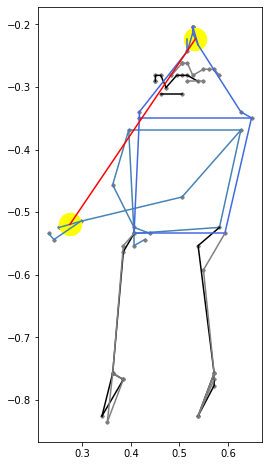

In [16]:
fig = plt.figure(figsize=(4, 8))
#plt.ylim(1,0)
#plt.xlim(0,1)

plt.plot(df_left_eyes_0.iloc[:,0], -df_left_eyes_0.iloc[:, 1], color='black',zorder=2) #left eyes
plt.plot(df_right_eyes_0.iloc[:,0], -df_right_eyes_0.iloc[:, 1], color='black',zorder=2) #right eyes

plt.plot(df_x_y_0.iloc[9:11,0], -df_x_y_0.iloc[9:11,1], color='black',zorder=2) #mouth

plt.plot(df_left_hand_0.iloc[:,0], -df_left_hand_0.iloc[:,1], color='steelblue',zorder=2) #left hand
plt.plot(df_right_hand_0.iloc[:,0], -df_right_hand_0.iloc[:,1], color='steelblue',zorder=2) #right hand

plt.plot(df_left_arm_0.iloc[:,0], -df_left_arm_0.iloc[:,1], color='steelblue',zorder=2) #left arm
plt.plot(df_right_arm_0.iloc[:,0], -df_right_arm_0.iloc[:,1], color='steelblue',zorder=2) #right arm

plt.plot(df_x_y_0.iloc[11:13,0], -df_x_y_0.iloc[11:13,1], color='steelblue',zorder=2) #shoulder
plt.plot(df_left_shoulder_0.iloc[:,0], -df_left_shoulder_0.iloc[:,1], color='steelblue',zorder=2) #left shoulder
plt.plot(df_right_shoulder_0.iloc[:,0], -df_right_shoulder_0.iloc[:,1], color='steelblue',zorder=2) #right shoulder

plt.plot(df_x_y_0.iloc[23:25,0], -df_x_y_0.iloc[23:25,1], color='steelblue',zorder=2) #hip

plt.plot(df_left_leg_0.iloc[:,0], -df_left_leg_0.iloc[:,1], color='black',zorder=2) #left leg
plt.plot(df_right_leg_0.iloc[:,0], -df_right_leg_0.iloc[:,1], color='black',zorder=2) #right leg

plt.plot(df_left_foot_0.iloc[:,0], -df_left_foot_0.iloc[:,1], color='black',zorder=2) #left foot
plt.plot(df_right_foot_0.iloc[:,0], -df_right_foot_0.iloc[:,1], color='black',zorder=2) #right foot


for i in range(df_x_y_0.shape[0]):
    plt.scatter(df_x_y_0.iloc[:, 0], -df_x_y_0.iloc[:, 1], alpha=0.1, color='gray', s=7)
    #plt.text(df_x_y.iloc[i,0]+1, -df_x_y.iloc[i,1], str(i), size=10)
    
    
    
plt.plot(df_left_eyes_1.iloc[:,0], -df_left_eyes_1.iloc[:, 1], color='gray',zorder=2) #left eyes
plt.plot(df_right_eyes_1.iloc[:,0], -df_right_eyes_1.iloc[:, 1], color='gray',zorder=2) #right eyes

plt.plot(df_x_y_1.iloc[9:11,0], -df_x_y_1.iloc[9:11,1], color='gray',zorder=2) #mouth

plt.plot(df_left_hand_1.iloc[:,0], -df_left_hand_1.iloc[:,1], color='royalblue',zorder=2) #left hand
plt.plot(df_right_hand_1.iloc[:,0], -df_right_hand_1.iloc[:,1], color='royalblue',zorder=2) #right hand

plt.plot(df_left_arm_1.iloc[:,0], -df_left_arm_1.iloc[:,1], color='royalblue',zorder=2) #left arm
plt.plot(df_right_arm_1.iloc[:,0], -df_right_arm_1.iloc[:,1], color='royalblue',zorder=2) #right arm

plt.plot(df_x_y_1.iloc[11:13,0], -df_x_y_1.iloc[11:13,1], color='royalblue',zorder=2) #shoulder
plt.plot(df_left_shoulder_1.iloc[:,0], -df_left_shoulder_1.iloc[:,1], color='royalblue',zorder=2) #left shoulder
plt.plot(df_right_shoulder_1.iloc[:,0], -df_right_shoulder_1.iloc[:,1], color='royalblue',zorder=2) #right shoulder

plt.plot(df_x_y_1.iloc[23:25,0], -df_x_y_1.iloc[23:25,1], color='royalblue',zorder=2) #hip

plt.plot(df_left_leg_1.iloc[:,0], -df_left_leg_1.iloc[:,1], color='gray',zorder=2) #left leg
plt.plot(df_right_leg_1.iloc[:,0], -df_right_leg_1.iloc[:,1], color='gray',zorder=2) #right leg

plt.plot(df_left_foot_1.iloc[:,0], -df_left_foot_1.iloc[:,1], color='gray',zorder=2) #left foot
plt.plot(df_right_foot_1.iloc[:,0], -df_right_foot_1.iloc[:,1], color='gray',zorder=2) #right foot


for i in range(df_x_y_1.shape[0]):
    plt.scatter(df_x_y_1.iloc[:, 0], -df_x_y_1.iloc[:, 1], alpha=0.1, color='gray', s=7)
    #plt.text(df_x_y.iloc[i,0]+1, -df_x_y.iloc[i,1], str(i), size=10)
    
plt.scatter(hand_0_min[0], -hand_0_min[1], color='yellow', s=500)
plt.scatter(hand_1_min[0], -hand_1_min[1], color='yellow', s=500)
plt.plot(x_hand, y_hand, color='red')

plt.show()

## 운동량 데이터

In [17]:
df_ = pd.read_csv('Total_dataset/total_dataset(_preproc+index)(3).csv')
df_.head()

,Unnamed: 0,P_ind,NOSE_x,NOSE_y,NOSE_z,LEFT_EYE_INNER_x,LEFT_EYE_INNER_y,LEFT_EYE_INNER_z,LEFT_EYE_x,LEFT_EYE_y,...,LEFT_FOOT_INDEX_x,LEFT_FOOT_INDEX_y,LEFT_FOOT_INDEX_z,RIGHT_FOOT_INDEX_x,RIGHT_FOOT_INDEX_y,RIGHT_FOOT_INDEX_z,position_state,frame_count,now_index,next_index
0,0,0.0,-0.043956,-0.009709,-0.153846,-0.032967,-0.009709,-0.153846,-0.021978,-0.009709,...,0.0,0.0,-0.065527,0.0,0.0,-0.091168,0.0,22.0,112.0,123.0
1,1,0.0,-0.076923,0.000000,0.156695,-0.065934,0.000000,0.142450,-0.065934,0.000000,...,0.0,0.0,0.096866,0.0,0.0,0.113960,1.0,23.0,123.0,134.0
2,2,0.0,0.098901,-0.009709,-0.014245,0.076923,-0.009709,0.002849,0.076923,-0.009709,...,0.0,0.0,0.017094,0.0,0.0,-0.017094,0.0,23.0,134.0,146.0
3,3,0.0,0.032967,0.019417,0.028490,0.021978,0.019417,0.025641,0.010989,0.019417,...,0.0,0.0,-0.074074,0.0,0.0,-0.037037,1.0,22.0,146.0,157.0
4,4,0.0,-0.065934,-0.009709,-0.116809,-0.043956,-0.009709,-0.111111,-0.032967,-0.009709,...,0.0,0.0,0.005698,0.0,0.0,-0.034188,0.0,23.0,157.0,168.0


In [18]:
df = df_.iloc[:, 2:101]
df

,NOSE_x,NOSE_y,NOSE_z,LEFT_EYE_INNER_x,LEFT_EYE_INNER_y,LEFT_EYE_INNER_z,LEFT_EYE_x,LEFT_EYE_y,LEFT_EYE_z,LEFT_EYE_OUTER_x,...,LEFT_HEEL_z,RIGHT_HEEL_x,RIGHT_HEEL_y,RIGHT_HEEL_z,LEFT_FOOT_INDEX_x,LEFT_FOOT_INDEX_y,LEFT_FOOT_INDEX_z,RIGHT_FOOT_INDEX_x,RIGHT_FOOT_INDEX_y,RIGHT_FOOT_INDEX_z
0,-0.043956,-0.009709,-0.153846,-0.032967,-0.009709,-0.153846,-0.021978,-0.009709,-0.153846,-0.010989,...,-0.039886,0.000000,0.0,-0.068376,0.000000,0.000000,-0.065527,0.000000,0.000000,-0.091168
1,-0.076923,0.000000,0.156695,-0.065934,0.000000,0.142450,-0.065934,0.000000,0.142450,-0.076923,...,0.054131,-0.010989,0.0,0.076923,0.000000,0.000000,0.096866,0.000000,0.000000,0.113960
2,0.098901,-0.009709,-0.014245,0.076923,-0.009709,0.002849,0.076923,-0.009709,0.002849,0.076923,...,0.025641,0.000000,0.0,-0.017094,0.000000,0.000000,0.017094,0.000000,0.000000,-0.017094
3,0.032967,0.019417,0.028490,0.021978,0.019417,0.025641,0.010989,0.019417,0.025641,0.010989,...,-0.062678,0.000000,0.0,-0.019943,0.000000,0.000000,-0.074074,0.000000,0.000000,-0.037037
4,-0.065934,-0.009709,-0.116809,-0.043956,-0.009709,-0.111111,-0.032967,-0.009709,-0.111111,-0.021978,...,0.011396,0.000000,0.0,-0.019943,0.000000,0.000000,0.005698,0.000000,0.000000,-0.034188
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4439,0.043956,0.019417,-0.065527,0.043956,0.009709,-0.071225,0.032967,0.009709,-0.071225,0.032967,...,0.011396,0.000000,0.0,0.031339,0.000000,0.019417,0.019943,0.000000,0.009709,0.039886
4440,-0.043956,-0.019417,0.079772,-0.043956,-0.009709,0.082621,-0.032967,-0.009709,0.082621,-0.032967,...,-0.002849,0.000000,0.0,-0.028490,-0.010989,-0.019417,-0.011396,0.000000,-0.009709,-0.031339
4441,-0.032967,0.009709,-0.005698,-0.043956,0.009709,-0.008547,-0.043956,0.009709,-0.008547,-0.043956,...,0.025641,-0.010989,0.0,0.045584,0.021978,0.009709,0.056980,-0.010989,0.000000,0.071225
4442,0.010989,0.000000,-0.042735,0.021978,-0.009709,-0.039886,0.010989,-0.009709,-0.039886,0.010989,...,-0.025641,0.010989,0.0,-0.034188,0.000000,0.000000,-0.054131,0.010989,0.000000,-0.059829


In [19]:
#index 112
num=412

df_x_ = df_.filter(regex='_x').iloc[num, :]
df_y_ = df_.filter(regex='_y').iloc[num, :]
df_z_ = df_.filter(regex='_z').iloc[num, :]
df_x_.shape, df_y_.shape, df_z_.shape

df_x_s_ = pd.DataFrame(df_x_.values, columns=[0])
df_y_s_ = pd.DataFrame(df_y_.values, columns=[1])
df_z_s_ = pd.DataFrame(df_z_.values, columns=[2])
df_x_s_.shape, df_y_s_.shape

df_x_y_ = pd.concat([df_x_s_, df_y_s_], axis=1)
np.ndarray(df_x_y_)
df_x_y_.shape  #운동량 X, Y 데이터

(33, 2)

In [20]:
#position_0=112
#position_1=123

df_x_y_sum = df_x_y_1 + df_x_y_

In [21]:
#position=0
df_left_eyes_sum= pd.concat([df_x_y_sum.iloc[:1,:], df_x_y_sum.iloc[1:4,:],df_x_y_sum.iloc[7:8,:]])
df_right_eyes_sum= pd.concat([df_x_y_sum.iloc[:1,:], df_x_y_sum.iloc[4:7,:],df_x_y_sum.iloc[8:9,:]])

df_left_hand_sum= pd.concat([df_x_y_sum.iloc[15:16,:], df_x_y_sum.iloc[21:22,:]])
df_right_hand_sum= pd.concat([df_x_y_sum.iloc[16:17,:], df_x_y_sum.iloc[22:23,:]])

df_left_arm_sum = pd.concat([df_x_y_sum.iloc[11:12,:],df_x_y_sum.iloc[13:14,:],df_x_y_sum.iloc[15:16,:],df_x_y_sum.iloc[17:18,:],df_x_y_sum.iloc[19:20,:]])
df_right_arm_sum = pd.concat([df_x_y_sum.iloc[12:13,:],df_x_y_sum.iloc[14:15,:],df_x_y_sum.iloc[16:17,:],df_x_y_sum.iloc[18:19,:],df_x_y_sum.iloc[20:21,:]])

df_left_leg_sum = pd.concat([df_x_y_sum.iloc[23:24,:],df_x_y_sum.iloc[25:26,:],df_x_y_sum.iloc[27:28,:],df_x_y_sum.iloc[29:30,:],df_x_y_sum.iloc[31:32,:]])
df_right_leg_sum = pd.concat([df_x_y_sum.iloc[24:25,:],df_x_y_sum.iloc[26:27,:],df_x_y_sum.iloc[28:29,:],df_x_y_sum.iloc[30:31,:],df_x_y_sum.iloc[32:,:]])

df_left_shoulder_sum= pd.concat([df_x_y_sum.iloc[11:12,:],df_x_y_sum.iloc[23:24,:]])
df_right_shoulder_sum= pd.concat([df_x_y_sum.iloc[12:13,:],df_x_y_sum.iloc[24:25,:]])

df_left_foot_sum= pd.concat([df_x_y_sum.iloc[27:28,:],df_x_y_sum.iloc[31:32,:]])
df_right_foot_sum= pd.concat([df_x_y_sum.iloc[28:29,:],df_x_y_sum.iloc[32:,:]])

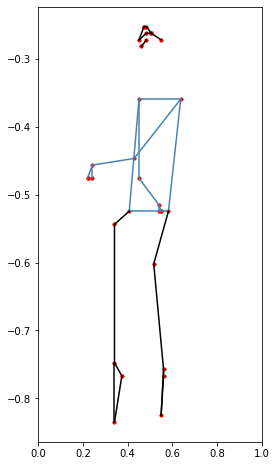

In [22]:
fig = plt.figure(figsize=(4, 8))
#plt.ylim(-1,0)
plt.xlim(0,1)

plt.plot(df_left_eyes_sum.iloc[:,0], -df_left_eyes_sum.iloc[:, 1], color='black',zorder=2) #left eyes
plt.plot(df_right_eyes_sum.iloc[:,0], -df_right_eyes_sum.iloc[:, 1], color='black',zorder=2) #right eyes

plt.plot(df_x_y_sum.iloc[9:11,0], -df_x_y_sum.iloc[9:11,1], color='black',zorder=2) #mouth

plt.plot(df_left_hand_sum.iloc[:,0], -df_left_hand_sum.iloc[:,1], color='steelblue',zorder=2) #left hand
plt.plot(df_right_hand_sum.iloc[:,0], -df_right_hand_sum.iloc[:,1], color='steelblue',zorder=2) #right hand

plt.plot(df_left_arm_sum.iloc[:,0], -df_left_arm_sum.iloc[:,1], color='steelblue',zorder=2) #left arm
plt.plot(df_right_arm_sum.iloc[:,0], -df_right_arm_sum.iloc[:,1], color='steelblue',zorder=2) #right arm

plt.plot(df_x_y_sum.iloc[11:13,0], -df_x_y_sum.iloc[11:13,1], color='steelblue',zorder=2) #shoulder
plt.plot(df_left_shoulder_sum.iloc[:,0], -df_left_shoulder_sum.iloc[:,1], color='steelblue',zorder=2) #left shoulder
plt.plot(df_right_shoulder_sum.iloc[:,0], -df_right_shoulder_sum.iloc[:,1], color='steelblue',zorder=2) #right shoulder

plt.plot(df_x_y_sum.iloc[23:25,0], -df_x_y_sum.iloc[23:25,1], color='steelblue',zorder=2) #hip

plt.plot(df_left_leg_sum.iloc[:,0], -df_left_leg_sum.iloc[:,1], color='black',zorder=2) #left leg
plt.plot(df_right_leg_sum.iloc[:,0], -df_right_leg_sum.iloc[:,1], color='black',zorder=2) #right leg

plt.plot(df_left_foot_sum.iloc[:,0], -df_left_foot_sum.iloc[:,1], color='black',zorder=2) #left foot
plt.plot(df_right_foot_sum.iloc[:,0], -df_right_foot_sum.iloc[:,1], color='black',zorder=2) #right foot


for i in range(df_x_y_sum.shape[0]):
    plt.scatter(df_x_y_sum.iloc[:, 0], -df_x_y_sum.iloc[:, 1], alpha=0.1, color='red', s=7)
    #plt.text(df_x_y.iloc[i,0]+1, -df_x_y.iloc[i,1], str(i), size=10)
    

## VAE 증강한 운동량 데이터

In [23]:
#left dataframe
df_vae_left = pd.read_csv('복원데이터8개(0919)/CVAE_recon_df_0_L_38(M_06).csv').iloc[:, 1:100]
df_vae_left.head()

,NOSE_x,NOSE_y,NOSE_z,LEFT_EYE_INNER_x,LEFT_EYE_INNER_y,LEFT_EYE_INNER_z,LEFT_EYE_x,LEFT_EYE_y,LEFT_EYE_z,LEFT_EYE_OUTER_x,...,LEFT_HEEL_z,RIGHT_HEEL_x,RIGHT_HEEL_y,RIGHT_HEEL_z,LEFT_FOOT_INDEX_x,LEFT_FOOT_INDEX_y,LEFT_FOOT_INDEX_z,RIGHT_FOOT_INDEX_x,RIGHT_FOOT_INDEX_y,RIGHT_FOOT_INDEX_z
0,0.089822,-0.001548,-0.020359,0.070457,0.001706,-0.007726,0.065636,0.000401,-0.009062,0.064453,...,-0.009629,0.000333,-0.000270,-0.041573,-0.001671,-0.002016,-0.017859,0.007558,0.000488,-0.049665
1,0.039373,0.001393,0.039029,0.021429,0.011348,0.047951,0.023971,0.000958,0.049125,0.032292,...,0.013051,0.001473,-0.005050,0.009824,-0.003915,-0.014204,0.017672,-0.009202,0.012932,0.011694
2,0.093043,-0.002650,-0.025497,0.071907,0.002804,-0.013193,0.070283,-0.000149,-0.012796,0.065815,...,-0.009203,0.001894,0.001210,-0.042171,0.000171,-0.003121,-0.019752,0.007104,0.001566,-0.052209
3,-0.096056,-0.006450,-0.133497,-0.066553,-0.008080,-0.142867,-0.066765,-0.003297,-0.150063,-0.065304,...,0.067043,0.004146,-0.002658,0.060157,0.008373,-0.005740,0.064286,0.021551,-0.007530,0.060757
4,0.090085,-0.002686,-0.064266,0.075948,-0.002355,-0.049213,0.074015,0.000748,-0.049986,0.072405,...,-0.020654,-0.002811,0.000056,-0.047587,-0.003935,-0.000077,-0.035951,0.004084,-0.000968,-0.064427


In [24]:
#right dataframe 1이면 내려가고 0이면 올라가고 tartget position
df_vae_right = pd.read_csv('복원데이터8개(0919)/CVAE_recon_df_1_R_42(BM_06).csv').iloc[:, 1:100]
df_vae_right.head()

,NOSE_x,NOSE_y,NOSE_z,LEFT_EYE_INNER_x,LEFT_EYE_INNER_y,LEFT_EYE_INNER_z,LEFT_EYE_x,LEFT_EYE_y,LEFT_EYE_z,LEFT_EYE_OUTER_x,...,LEFT_HEEL_z,RIGHT_HEEL_x,RIGHT_HEEL_y,RIGHT_HEEL_z,LEFT_FOOT_INDEX_x,LEFT_FOOT_INDEX_y,LEFT_FOOT_INDEX_z,RIGHT_FOOT_INDEX_x,RIGHT_FOOT_INDEX_y,RIGHT_FOOT_INDEX_z
0,-0.022541,0.005177,0.144560,-0.021846,0.006358,0.133827,-0.028185,0.006265,0.130131,-0.026581,...,-0.001560,0.001435,-0.001475,0.020828,0.008720,-0.000555,0.015845,-0.003040,0.000348,0.041231
1,-0.105547,-0.001951,0.015214,-0.084036,0.005141,-0.001674,-0.078386,0.005041,0.002150,-0.076825,...,-0.000480,-0.007922,0.000407,0.031362,-0.005771,0.003184,-0.002782,-0.017245,-0.004296,0.033755
2,-0.087079,-0.004754,0.030773,-0.065250,0.000191,0.013506,-0.062677,-0.002693,0.019707,-0.058128,...,0.020359,-0.007556,0.001387,0.039161,-0.005179,-0.002296,0.026146,-0.014250,0.000561,0.054089
3,-0.048678,0.000273,0.089978,-0.049012,-0.000028,0.076897,-0.050525,0.002495,0.078698,-0.045622,...,0.023526,-0.000603,-0.003712,0.036006,-0.000428,0.000119,0.046115,-0.003624,0.000575,0.060653
4,-0.065739,0.002326,0.123866,-0.065473,-0.001303,0.116086,-0.062845,-0.000130,0.112752,-0.060503,...,0.048107,0.000248,-0.001832,0.063627,-0.002553,-0.000595,0.077295,-0.001371,0.000195,0.085624


In [25]:
#index 112
num=2

df_x_vae = df_vae_left.filter(regex='_x').iloc[num, :]
df_y_vae = df_vae_left.filter(regex='_y').iloc[num, :]
df_z_vae = df_vae_left.filter(regex='_z').iloc[num, :]
df_x_vae.shape, df_y_vae.shape, df_z_vae.shape

df_x_s_vae = pd.DataFrame(df_x_vae.values, columns=[0])
df_y_s_vae = pd.DataFrame(df_y_vae.values, columns=[1])
df_z_s_vae = pd.DataFrame(df_z_vae.values, columns=[2])
df_x_s_vae.shape, df_y_s_vae.shape

df_x_y_vae = pd.concat([df_x_s_vae, df_y_s_vae], axis=1)
np.ndarray(df_x_y_vae)
df_x_y_vae.shape

(33, 2)

In [26]:
df_x_y_sum_vae = df_x_y_0 + df_x_y_vae

In [27]:
#position=0
df_left_eyes_sum_vae= pd.concat([df_x_y_sum_vae.iloc[:1,:], df_x_y_sum_vae.iloc[1:4,:],df_x_y_sum_vae.iloc[7:8,:]])
df_right_eyes_sum_vae= pd.concat([df_x_y_sum_vae.iloc[:1,:], df_x_y_sum_vae.iloc[4:7,:],df_x_y_sum_vae.iloc[8:9,:]])

df_left_hand_sum_vae= pd.concat([df_x_y_sum_vae.iloc[15:16,:], df_x_y_sum_vae.iloc[21:22,:]])
df_right_hand_sum_vae= pd.concat([df_x_y_sum_vae.iloc[16:17,:], df_x_y_sum_vae.iloc[22:23,:]])

df_left_arm_sum_vae = pd.concat([df_x_y_sum_vae.iloc[11:12,:],df_x_y_sum_vae.iloc[13:14,:],df_x_y_sum_vae.iloc[15:16,:],df_x_y_sum_vae.iloc[17:18,:],df_x_y_sum_vae.iloc[19:20,:]])
df_right_arm_sum_vae = pd.concat([df_x_y_sum_vae.iloc[12:13,:],df_x_y_sum_vae.iloc[14:15,:],df_x_y_sum_vae.iloc[16:17,:],df_x_y_sum_vae.iloc[18:19,:],df_x_y_sum_vae.iloc[20:21,:]])

df_left_leg_sum_vae = pd.concat([df_x_y_sum_vae.iloc[23:24,:],df_x_y_sum_vae.iloc[25:26,:],df_x_y_sum_vae.iloc[27:28,:],df_x_y_sum_vae.iloc[29:30,:],df_x_y_sum_vae.iloc[31:32,:]])
df_right_leg_sum_vae = pd.concat([df_x_y_sum_vae.iloc[24:25,:],df_x_y_sum_vae.iloc[26:27,:],df_x_y_sum_vae.iloc[28:29,:],df_x_y_sum_vae.iloc[30:31,:],df_x_y_sum_vae.iloc[32:,:]])

df_left_shoulder_sum_vae= pd.concat([df_x_y_sum_vae.iloc[11:12,:],df_x_y_sum_vae.iloc[23:24,:]])
df_right_shoulder_sum_vae= pd.concat([df_x_y_sum_vae.iloc[12:13,:],df_x_y_sum_vae.iloc[24:25,:]])

df_left_foot_sum_vae= pd.concat([df_x_y_sum_vae.iloc[27:28,:],df_x_y_sum_vae.iloc[31:32,:]])
df_right_foot_sum_vae= pd.concat([df_x_y_sum_vae.iloc[28:29,:],df_x_y_sum_vae.iloc[32:,:]])

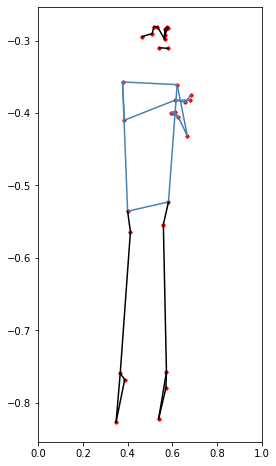

In [28]:
fig = plt.figure(figsize=(4, 8))
#plt.ylim(1,0)
plt.xlim(0,1)

plt.plot(df_left_eyes_sum_vae.iloc[:,0], -df_left_eyes_sum_vae.iloc[:, 1], color='black',zorder=2) #left eyes
plt.plot(df_right_eyes_sum_vae.iloc[:,0], -df_right_eyes_sum_vae.iloc[:, 1], color='black',zorder=2) #right eyes

plt.plot(df_x_y_sum_vae.iloc[9:11,0], -df_x_y_sum_vae.iloc[9:11,1], color='black',zorder=2) #mouth

plt.plot(df_left_hand_sum_vae.iloc[:,0], -df_left_hand_sum_vae.iloc[:,1], color='steelblue',zorder=2) #left hand
plt.plot(df_right_hand_sum_vae.iloc[:,0], -df_right_hand_sum_vae.iloc[:,1], color='steelblue',zorder=2) #right hand

plt.plot(df_left_arm_sum_vae.iloc[:,0], -df_left_arm_sum_vae.iloc[:,1], color='steelblue',zorder=2) #left arm
plt.plot(df_right_arm_sum_vae.iloc[:,0], -df_right_arm_sum_vae.iloc[:,1], color='steelblue',zorder=2) #right arm

plt.plot(df_x_y_sum_vae.iloc[11:13,0], -df_x_y_sum_vae.iloc[11:13,1], color='steelblue',zorder=2) #shoulder
plt.plot(df_left_shoulder_sum_vae.iloc[:,0], -df_left_shoulder_sum_vae.iloc[:,1], color='steelblue',zorder=2) #left shoulder
plt.plot(df_right_shoulder_sum_vae.iloc[:,0], -df_right_shoulder_sum_vae.iloc[:,1], color='steelblue',zorder=2) #right shoulder

plt.plot(df_x_y_sum_vae.iloc[23:25,0], -df_x_y_sum_vae.iloc[23:25,1], color='steelblue',zorder=2) #hip

plt.plot(df_left_leg_sum_vae.iloc[:,0], -df_left_leg_sum_vae.iloc[:,1], color='black',zorder=2) #left leg
plt.plot(df_right_leg_sum_vae.iloc[:,0], -df_right_leg_sum_vae.iloc[:,1], color='black',zorder=2) #right leg

plt.plot(df_left_foot_sum_vae.iloc[:,0], -df_left_foot_sum_vae.iloc[:,1], color='black',zorder=2) #left foot
plt.plot(df_right_foot_sum_vae.iloc[:,0], -df_right_foot_sum_vae.iloc[:,1], color='black',zorder=2) #right foot


for i in range(df_x_y_sum_vae.shape[0]):
    plt.scatter(df_x_y_sum_vae.iloc[:, 0], -df_x_y_sum_vae.iloc[:, 1], alpha=0.1, color='red', s=7)
    #plt.text(df_x_y.iloc[i,0]+1, -df_x_y.iloc[i,1], str(i), size=10)
    

In [29]:
#15, 31, 32

C:\Users\KangMinJeong\AppData\Local\Temp\ipykernel_2124\3657857987.py:36: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=(4, 8))


KeyboardInterrupt: 

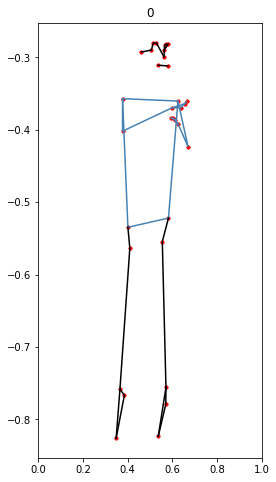

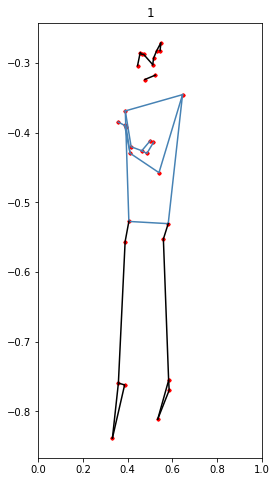

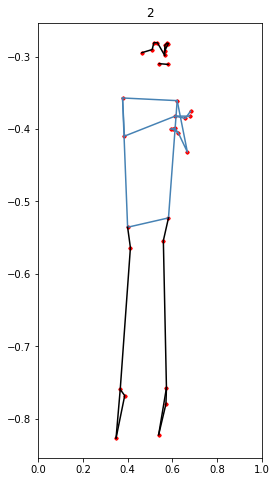

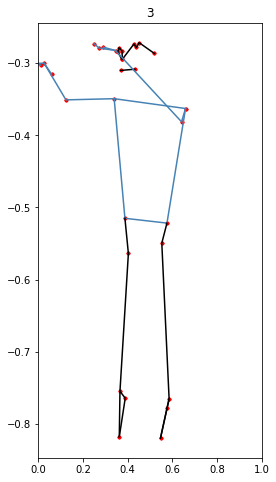

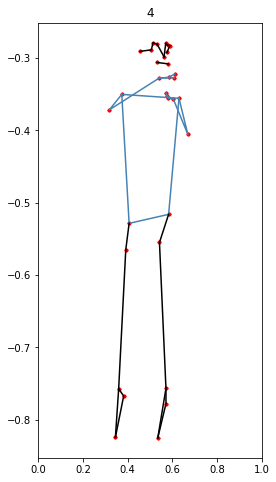

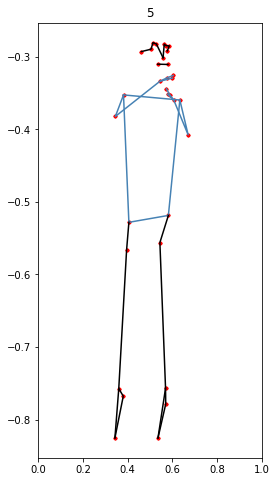

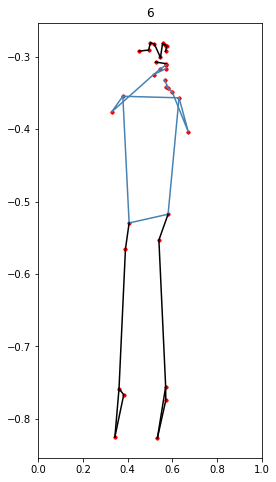

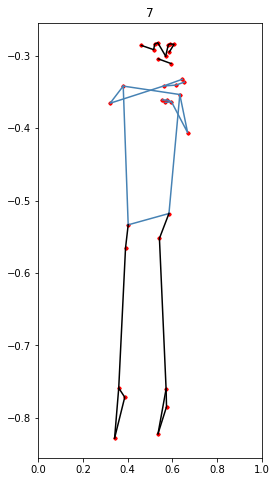

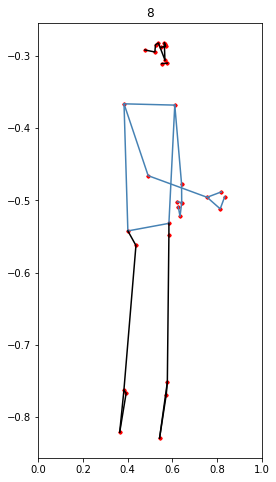

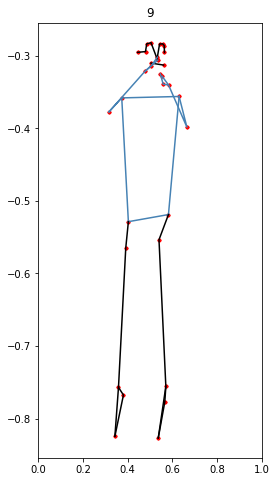

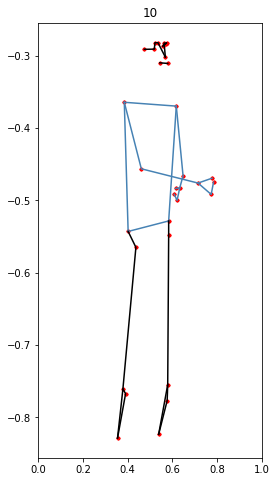

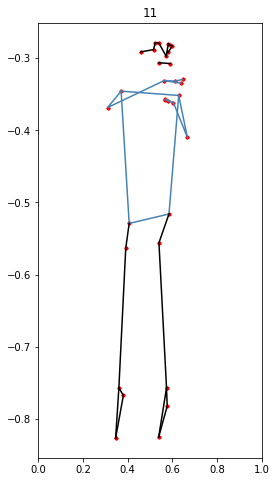

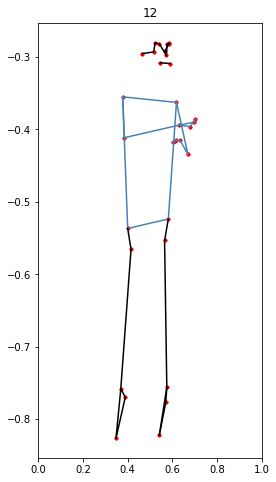

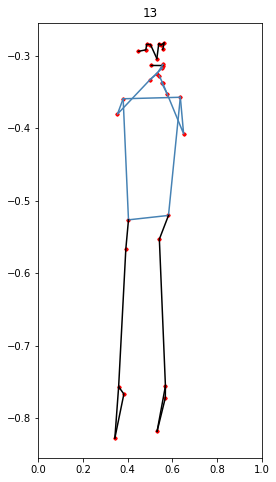

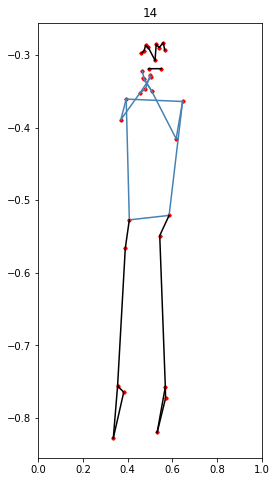

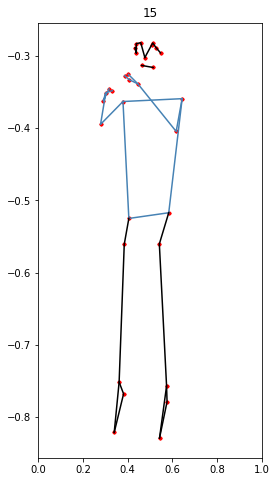

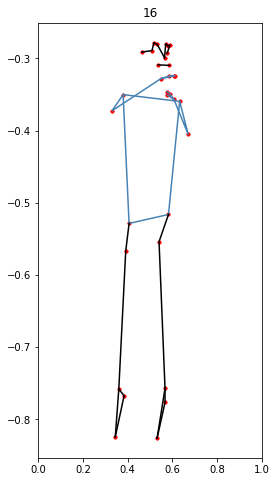

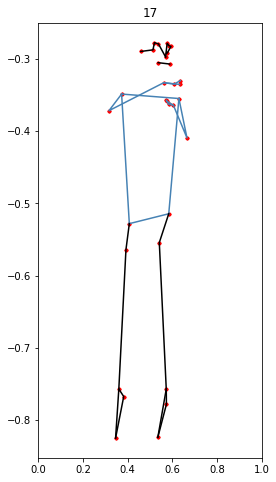

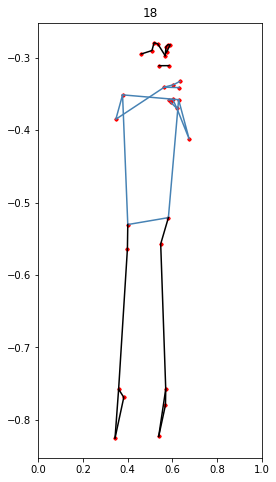

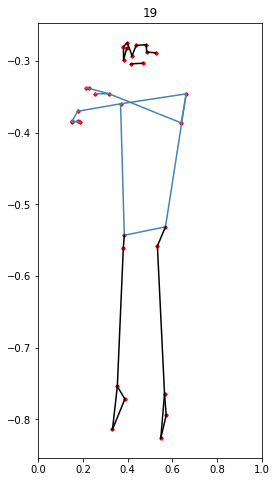

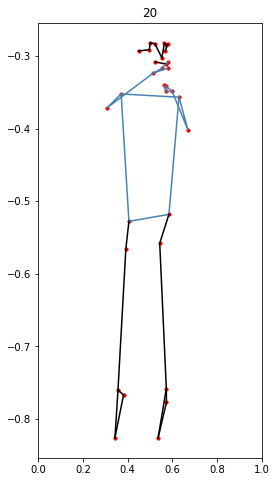

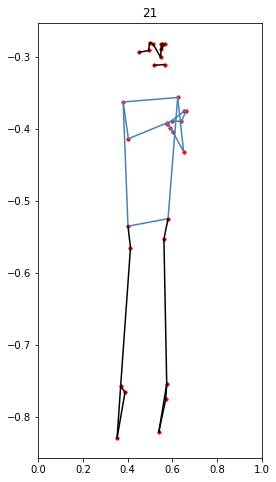

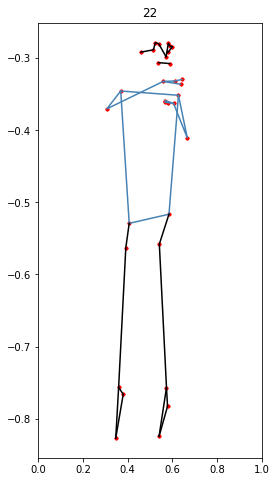

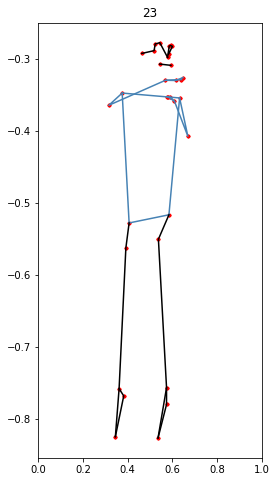

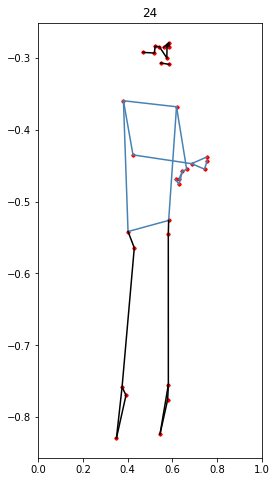

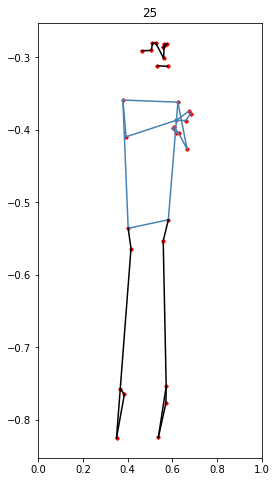

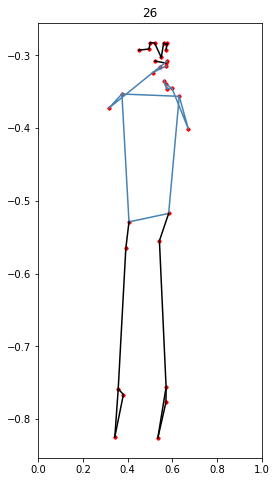

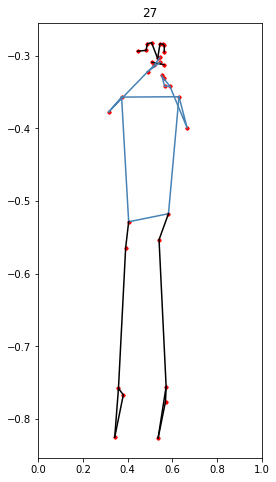

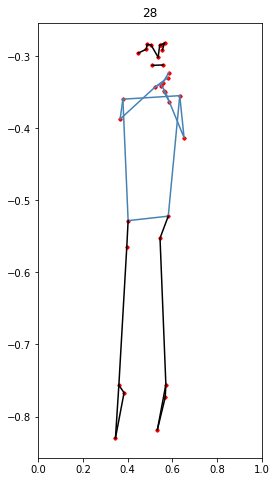

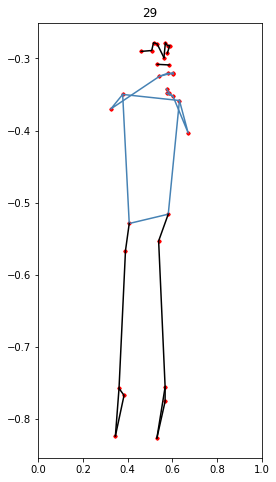

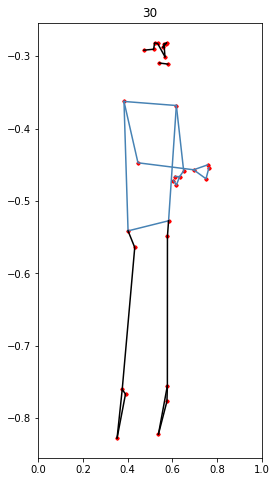

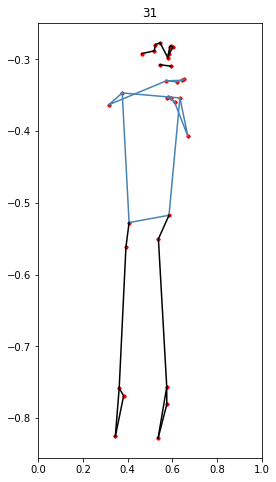

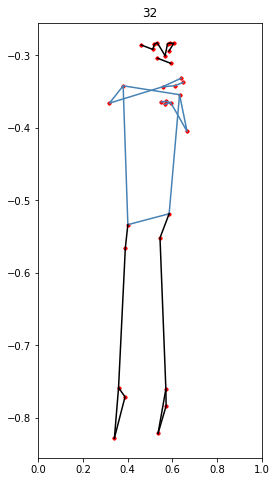

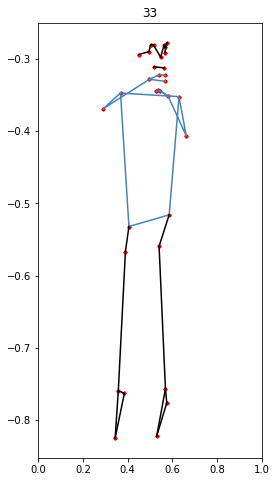

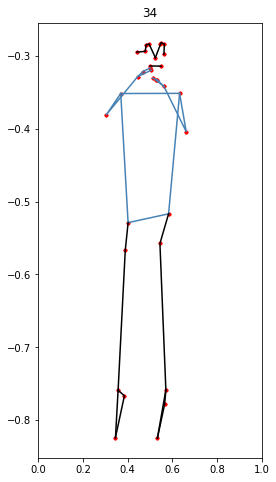

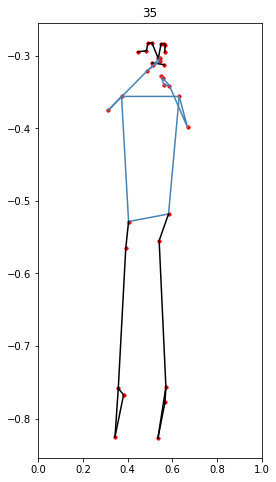

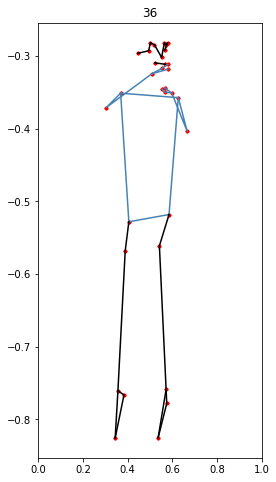

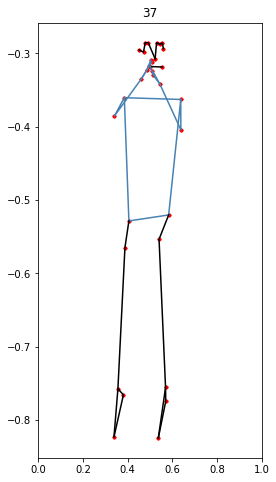

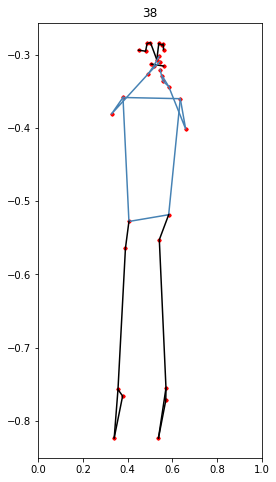

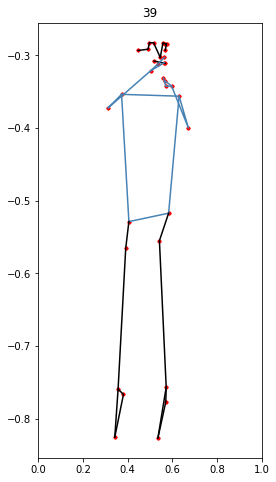

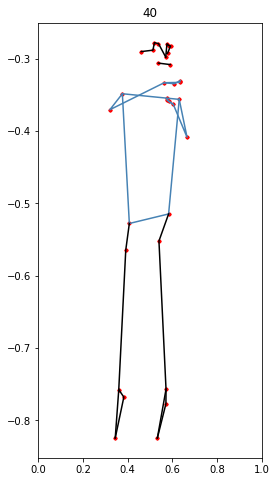

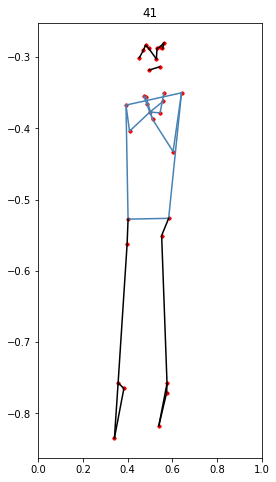

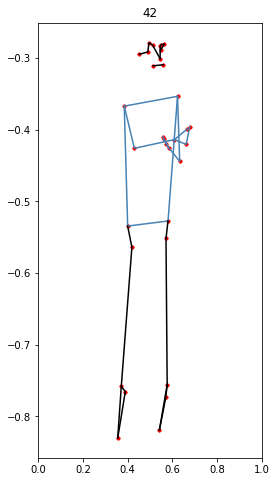

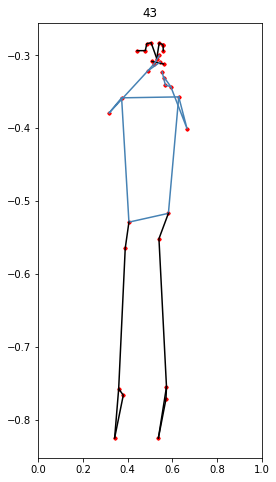

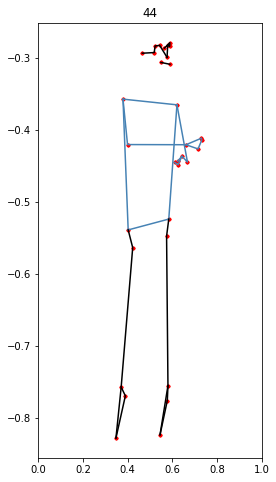

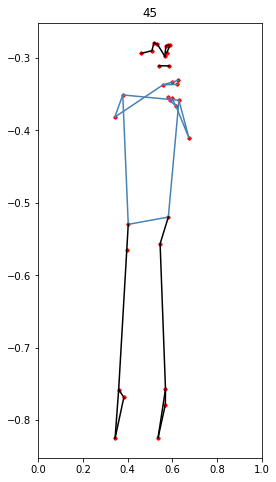

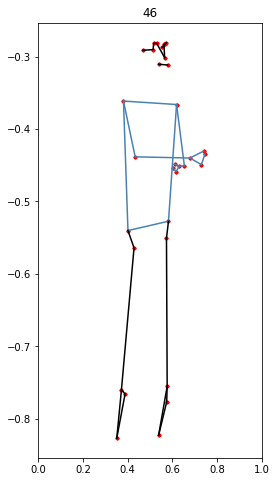

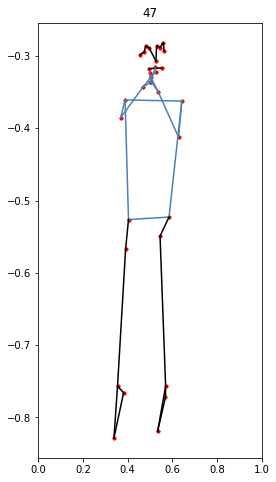

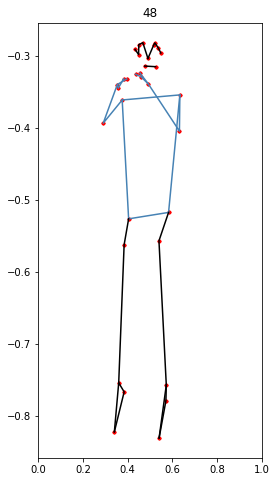

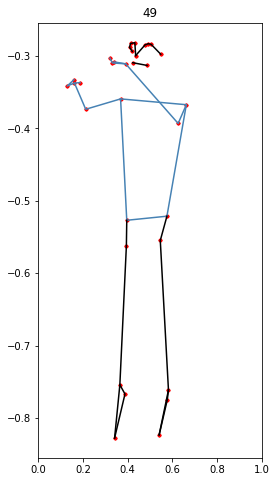

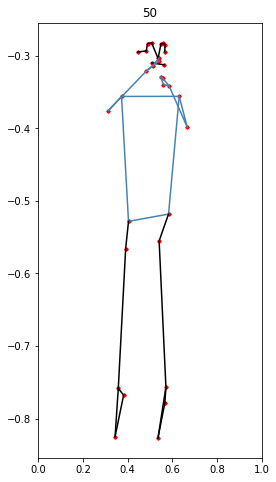

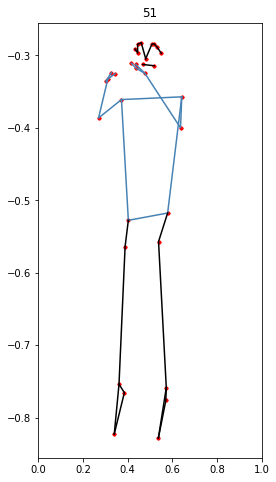

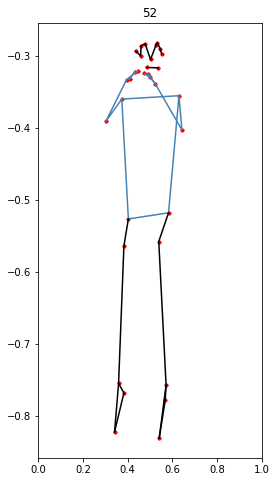

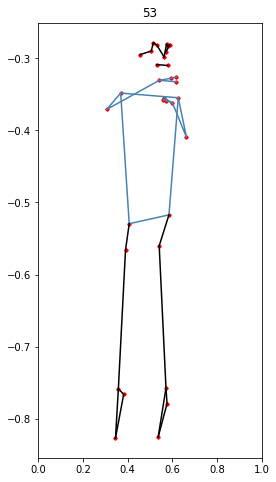

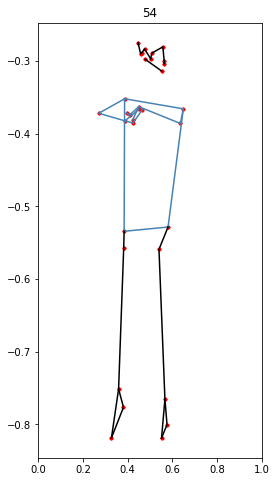

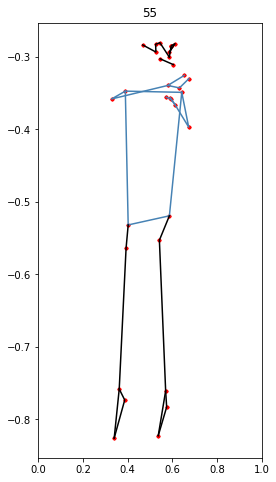

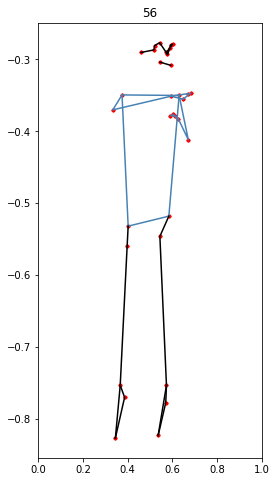

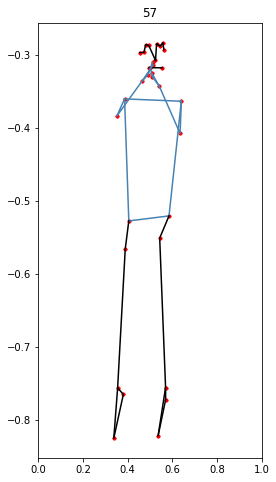

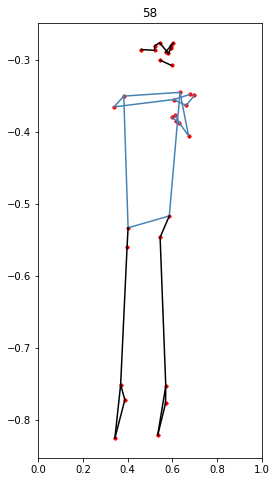

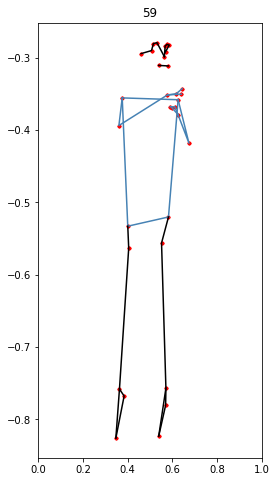

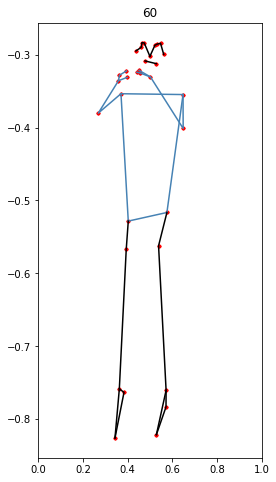

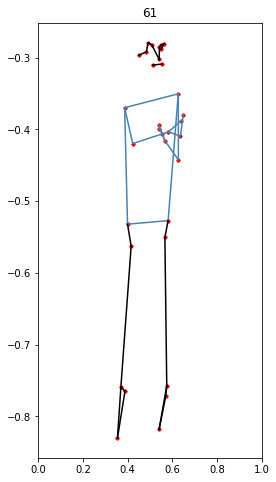

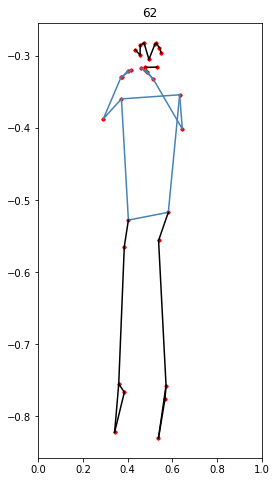

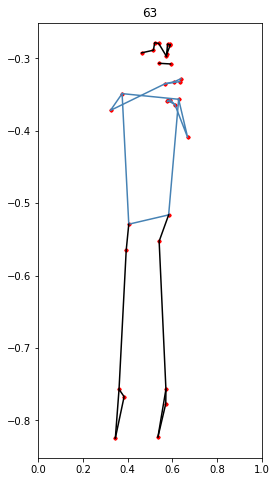

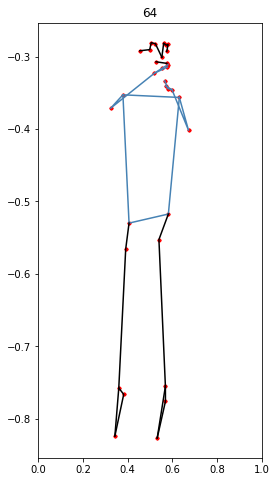

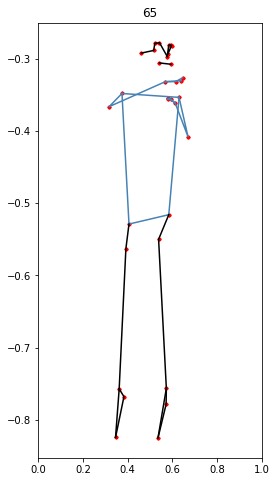

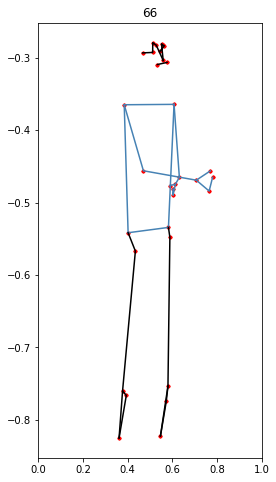

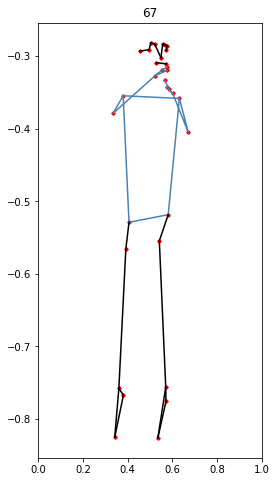

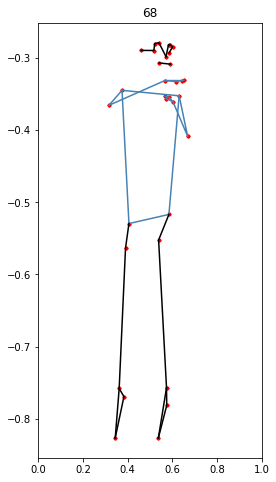

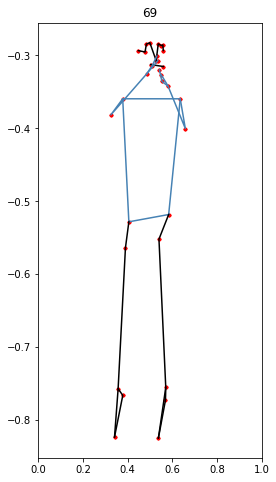

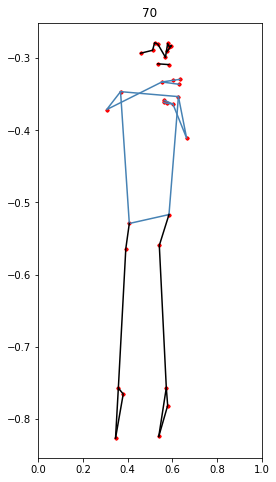

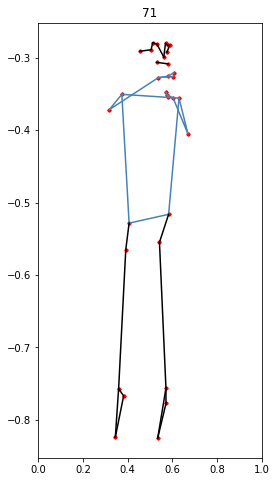

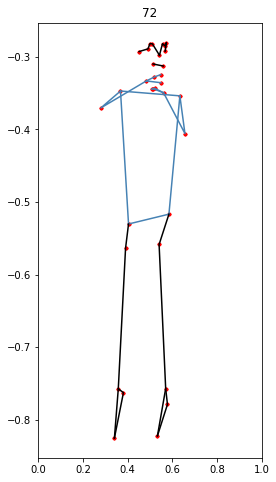

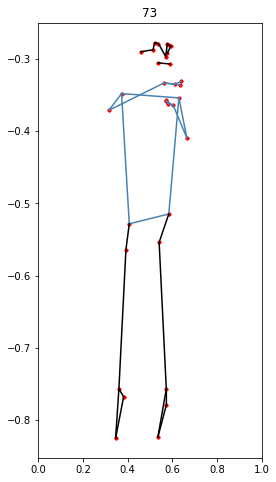

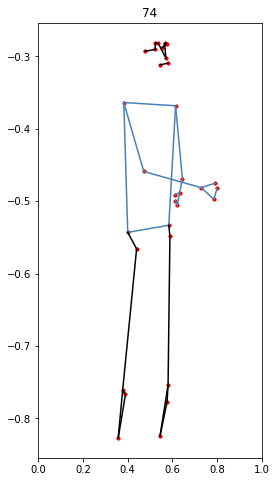

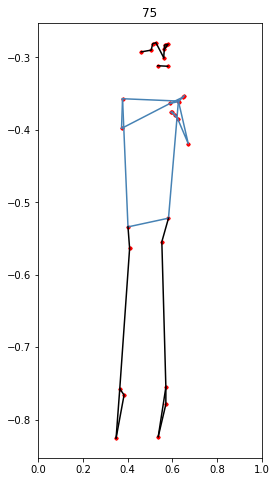

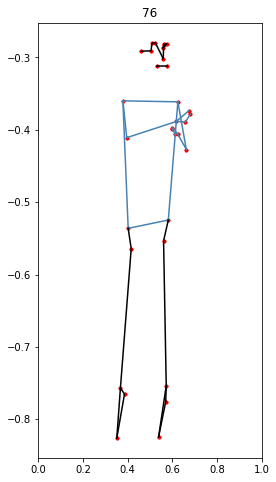

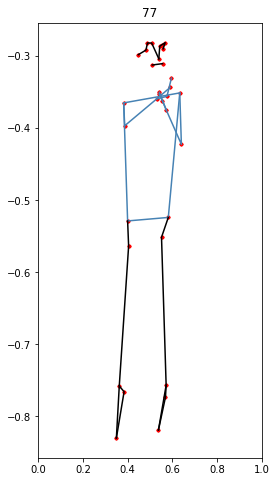

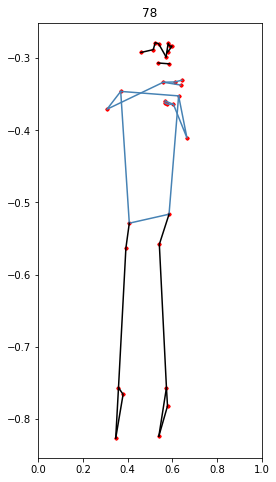

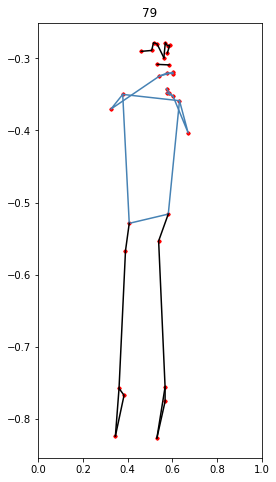

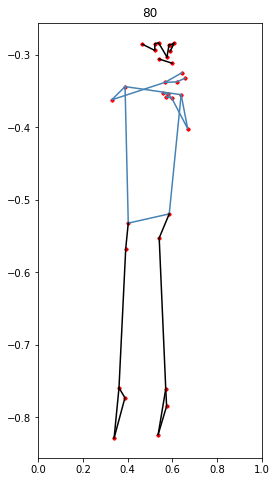

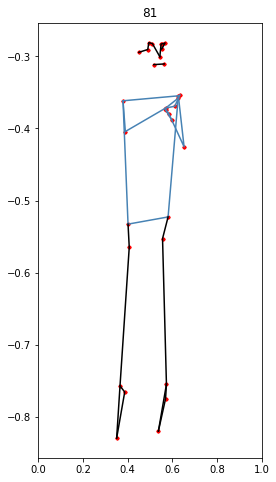

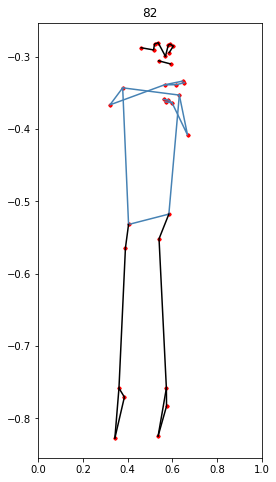

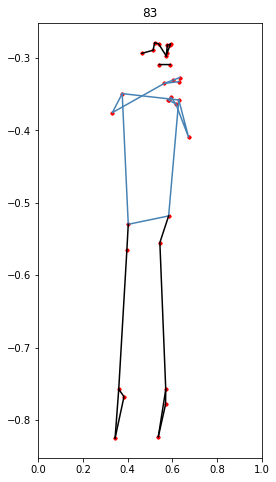

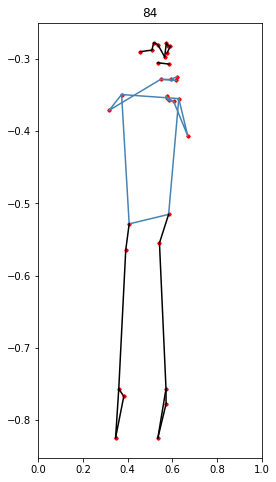

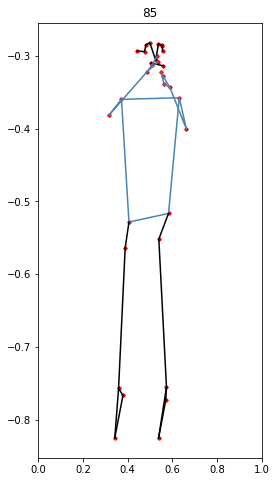

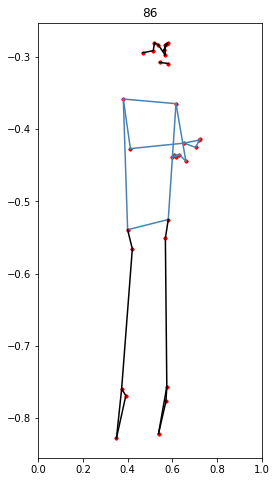

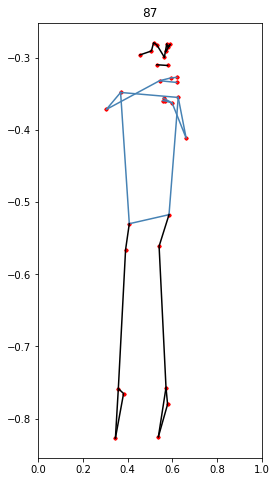

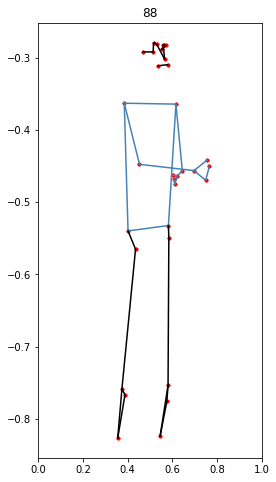

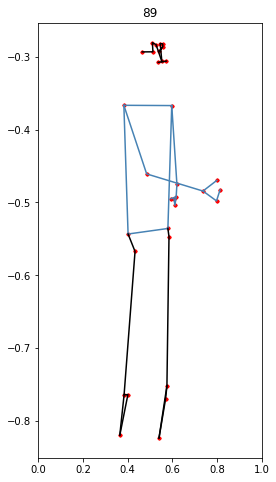

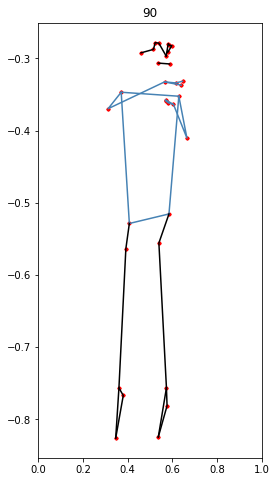

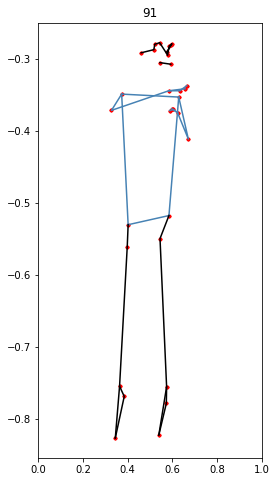

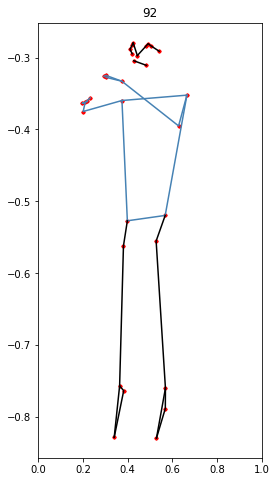

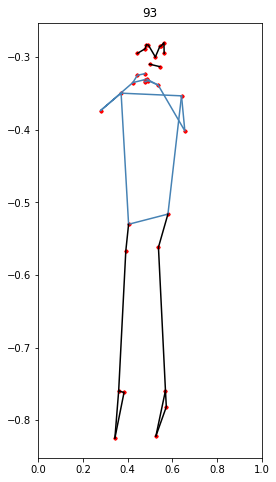

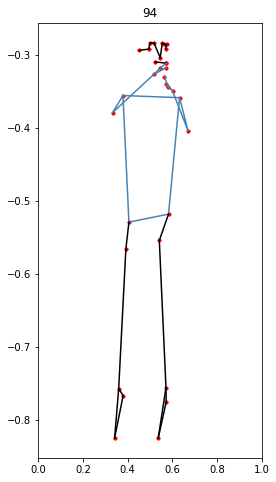

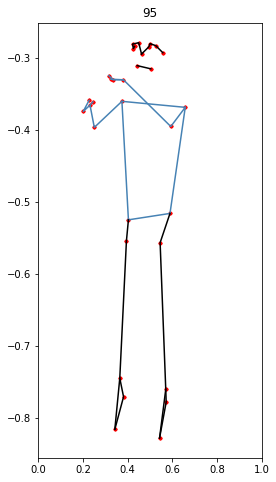

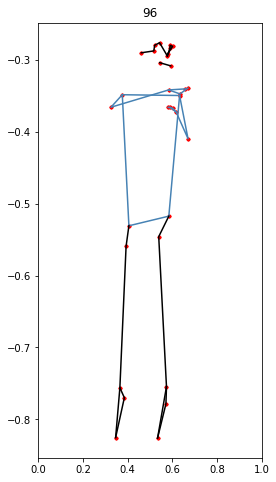

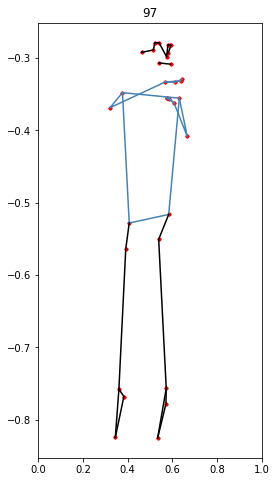

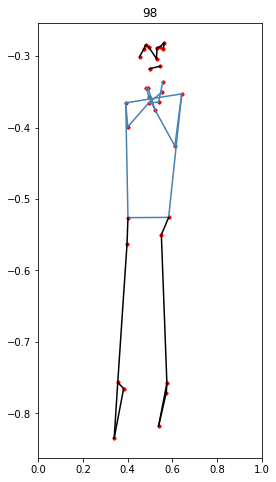

In [30]:
for i in range(len(df_vae_left)):
    num=i
    
    df_x_vae = df_vae_left.filter(regex='_x').iloc[i, :]
    df_y_vae = df_vae_left.filter(regex='_y').iloc[i, :]
    df_z_vae = df_vae_left.filter(regex='_z').iloc[i, :]

    df_x_s_vae = pd.DataFrame(df_x_vae.values, columns=[0])
    df_y_s_vae = pd.DataFrame(df_y_vae.values, columns=[1])
    df_z_s_vae = pd.DataFrame(df_z_vae.values, columns=[2])

    df_x_y_vae = pd.concat([df_x_s_vae, df_y_s_vae], axis=1)
    np.ndarray(df_x_y_vae)

    df_x_y_sum_vae = df_x_y_0 + df_x_y_vae

    #position=0
    df_left_eyes_sum_vae= pd.concat([df_x_y_sum_vae.iloc[:1,:], df_x_y_sum_vae.iloc[1:4,:],df_x_y_sum_vae.iloc[7:8,:]])
    df_right_eyes_sum_vae= pd.concat([df_x_y_sum_vae.iloc[:1,:], df_x_y_sum_vae.iloc[4:7,:],df_x_y_sum_vae.iloc[8:9,:]])

    df_left_hand_sum_vae= pd.concat([df_x_y_sum_vae.iloc[15:16,:], df_x_y_sum_vae.iloc[21:22,:]])
    df_right_hand_sum_vae= pd.concat([df_x_y_sum_vae.iloc[16:17,:], df_x_y_sum_vae.iloc[22:23,:]])

    df_left_arm_sum_vae = pd.concat([df_x_y_sum_vae.iloc[11:12,:],df_x_y_sum_vae.iloc[13:14,:],df_x_y_sum_vae.iloc[15:16,:],df_x_y_sum_vae.iloc[17:18,:],df_x_y_sum_vae.iloc[19:20,:]])
    df_right_arm_sum_vae = pd.concat([df_x_y_sum_vae.iloc[12:13,:],df_x_y_sum_vae.iloc[14:15,:],df_x_y_sum_vae.iloc[16:17,:],df_x_y_sum_vae.iloc[18:19,:],df_x_y_sum_vae.iloc[20:21,:]])

    df_left_leg_sum_vae = pd.concat([df_x_y_sum_vae.iloc[23:24,:],df_x_y_sum_vae.iloc[25:26,:],df_x_y_sum_vae.iloc[27:28,:],df_x_y_sum_vae.iloc[29:30,:],df_x_y_sum_vae.iloc[31:32,:]])
    df_right_leg_sum_vae = pd.concat([df_x_y_sum_vae.iloc[24:25,:],df_x_y_sum_vae.iloc[26:27,:],df_x_y_sum_vae.iloc[28:29,:],df_x_y_sum_vae.iloc[30:31,:],df_x_y_sum_vae.iloc[32:,:]])

    df_left_shoulder_sum_vae= pd.concat([df_x_y_sum_vae.iloc[11:12,:],df_x_y_sum_vae.iloc[23:24,:]])
    df_right_shoulder_sum_vae= pd.concat([df_x_y_sum_vae.iloc[12:13,:],df_x_y_sum_vae.iloc[24:25,:]])

    df_left_foot_sum_vae= pd.concat([df_x_y_sum_vae.iloc[27:28,:],df_x_y_sum_vae.iloc[31:32,:]])
    df_right_foot_sum_vae= pd.concat([df_x_y_sum_vae.iloc[28:29,:],df_x_y_sum_vae.iloc[32:,:]])

    fig = plt.figure(figsize=(4, 8))
    plt.xlim(0,1)
    #     #plt.ylim(1,0)
    
    plt.plot(df_left_eyes_sum_vae.iloc[:,0], -df_left_eyes_sum_vae.iloc[:, 1], color='black',zorder=2) #left eyes
    plt.plot(df_right_eyes_sum_vae.iloc[:,0], -df_right_eyes_sum_vae.iloc[:, 1], color='black',zorder=2) #right eyes

    plt.plot(df_x_y_sum_vae.iloc[9:11,0], -df_x_y_sum_vae.iloc[9:11,1], color='black',zorder=2) #mouth

    plt.plot(df_left_hand_sum_vae.iloc[:,0], -df_left_hand_sum_vae.iloc[:,1], color='steelblue',zorder=2) #left hand
    plt.plot(df_right_hand_sum_vae.iloc[:,0], -df_right_hand_sum_vae.iloc[:,1], color='steelblue',zorder=2) #right hand

    plt.plot(df_left_arm_sum_vae.iloc[:,0], -df_left_arm_sum_vae.iloc[:,1], color='steelblue',zorder=2) #left arm
    plt.plot(df_right_arm_sum_vae.iloc[:,0], -df_right_arm_sum_vae.iloc[:,1], color='steelblue',zorder=2) #right arm

    plt.plot(df_x_y_sum_vae.iloc[11:13,0], -df_x_y_sum_vae.iloc[11:13,1], color='steelblue',zorder=2) #shoulder
    plt.plot(df_left_shoulder_sum_vae.iloc[:,0], -df_left_shoulder_sum_vae.iloc[:,1], color='steelblue',zorder=2) #left shoulder
    plt.plot(df_right_shoulder_sum_vae.iloc[:,0], -df_right_shoulder_sum_vae.iloc[:,1], color='steelblue',zorder=2) #right shoulder

    plt.plot(df_x_y_sum_vae.iloc[23:25,0], -df_x_y_sum_vae.iloc[23:25,1], color='steelblue',zorder=2) #hip

    plt.plot(df_left_leg_sum_vae.iloc[:,0], -df_left_leg_sum_vae.iloc[:,1], color='black',zorder=2) #left leg
    plt.plot(df_right_leg_sum_vae.iloc[:,0], -df_right_leg_sum_vae.iloc[:,1], color='black',zorder=2) #right leg

    plt.plot(df_left_foot_sum_vae.iloc[:,0], -df_left_foot_sum_vae.iloc[:,1], color='black',zorder=2) #left foot
    plt.plot(df_right_foot_sum_vae.iloc[:,0], -df_right_foot_sum_vae.iloc[:,1], color='black',zorder=2) #right foot
    
    plt.title(i)

    for j in range(df_x_y_sum_vae.shape[0]):
        plt.scatter(df_x_y_sum_vae.iloc[:, 0], -df_x_y_sum_vae.iloc[:, 1], alpha=0.1, color='red', s=7)
        #plt.text(df_x_y.iloc[i,0]+1, -df_x_y.iloc[i,1], str(i), size=10)

In [ ]:
df_x_y_1

In [ ]:
for i in range(len(df_vae_right)):
    num=i
    
    df_x_vae = df_vae_right.filter(regex='_x').iloc[i, :]
    df_y_vae = df_vae_right.filter(regex='_y').iloc[i, :]
    df_z_vae = df_vae_right.filter(regex='_z').iloc[i, :]

    df_x_s_vae = pd.DataFrame(df_x_vae.values, columns=[0])
    df_y_s_vae = pd.DataFrame(df_y_vae.values, columns=[1])
    df_z_s_vae = pd.DataFrame(df_z_vae.values, columns=[2])

    df_x_y_vae = pd.concat([df_x_s_vae, df_y_s_vae], axis=1)
    np.ndarray(df_x_y_vae)

    df_x_y_sum_vae = df_x_y_1 + df_x_y_vae

    #position=0
    df_left_eyes_sum_vae= pd.concat([df_x_y_sum_vae.iloc[:1,:], df_x_y_sum_vae.iloc[1:4,:],df_x_y_sum_vae.iloc[7:8,:]])
    df_right_eyes_sum_vae= pd.concat([df_x_y_sum_vae.iloc[:1,:], df_x_y_sum_vae.iloc[4:7,:],df_x_y_sum_vae.iloc[8:9,:]])

    df_left_hand_sum_vae= pd.concat([df_x_y_sum_vae.iloc[15:16,:], df_x_y_sum_vae.iloc[21:22,:]])
    df_right_hand_sum_vae= pd.concat([df_x_y_sum_vae.iloc[16:17,:], df_x_y_sum_vae.iloc[22:23,:]])

    df_left_arm_sum_vae = pd.concat([df_x_y_sum_vae.iloc[11:12,:],df_x_y_sum_vae.iloc[13:14,:],df_x_y_sum_vae.iloc[15:16,:],df_x_y_sum_vae.iloc[17:18,:],df_x_y_sum_vae.iloc[19:20,:]])
    df_right_arm_sum_vae = pd.concat([df_x_y_sum_vae.iloc[12:13,:],df_x_y_sum_vae.iloc[14:15,:],df_x_y_sum_vae.iloc[16:17,:],df_x_y_sum_vae.iloc[18:19,:],df_x_y_sum_vae.iloc[20:21,:]])

    df_left_leg_sum_vae = pd.concat([df_x_y_sum_vae.iloc[23:24,:],df_x_y_sum_vae.iloc[25:26,:],df_x_y_sum_vae.iloc[27:28,:],df_x_y_sum_vae.iloc[29:30,:],df_x_y_sum_vae.iloc[31:32,:]])
    df_right_leg_sum_vae = pd.concat([df_x_y_sum_vae.iloc[24:25,:],df_x_y_sum_vae.iloc[26:27,:],df_x_y_sum_vae.iloc[28:29,:],df_x_y_sum_vae.iloc[30:31,:],df_x_y_sum_vae.iloc[32:,:]])

    df_left_shoulder_sum_vae= pd.concat([df_x_y_sum_vae.iloc[11:12,:],df_x_y_sum_vae.iloc[23:24,:]])
    df_right_shoulder_sum_vae= pd.concat([df_x_y_sum_vae.iloc[12:13,:],df_x_y_sum_vae.iloc[24:25,:]])

    df_left_foot_sum_vae= pd.concat([df_x_y_sum_vae.iloc[27:28,:],df_x_y_sum_vae.iloc[31:32,:]])
    df_right_foot_sum_vae= pd.concat([df_x_y_sum_vae.iloc[28:29,:],df_x_y_sum_vae.iloc[32:,:]])

    fig = plt.figure(figsize=(4, 8))
    plt.xlim(0,1)
    #     #plt.ylim(1,0)
    
    plt.plot(df_left_eyes_sum_vae.iloc[:,0], -df_left_eyes_sum_vae.iloc[:, 1], color='black',zorder=2) #left eyes
    plt.plot(df_right_eyes_sum_vae.iloc[:,0], -df_right_eyes_sum_vae.iloc[:, 1], color='black',zorder=2) #right eyes

    plt.plot(df_x_y_sum_vae.iloc[9:11,0], -df_x_y_sum_vae.iloc[9:11,1], color='black',zorder=2) #mouth

    plt.plot(df_left_hand_sum_vae.iloc[:,0], -df_left_hand_sum_vae.iloc[:,1], color='steelblue',zorder=2) #left hand
    plt.plot(df_right_hand_sum_vae.iloc[:,0], -df_right_hand_sum_vae.iloc[:,1], color='steelblue',zorder=2) #right hand

    plt.plot(df_left_arm_sum_vae.iloc[:,0], -df_left_arm_sum_vae.iloc[:,1], color='steelblue',zorder=2) #left arm
    plt.plot(df_right_arm_sum_vae.iloc[:,0], -df_right_arm_sum_vae.iloc[:,1], color='steelblue',zorder=2) #right arm

    plt.plot(df_x_y_sum_vae.iloc[11:13,0], -df_x_y_sum_vae.iloc[11:13,1], color='steelblue',zorder=2) #shoulder
    plt.plot(df_left_shoulder_sum_vae.iloc[:,0], -df_left_shoulder_sum_vae.iloc[:,1], color='steelblue',zorder=2) #left shoulder
    plt.plot(df_right_shoulder_sum_vae.iloc[:,0], -df_right_shoulder_sum_vae.iloc[:,1], color='steelblue',zorder=2) #right shoulder

    plt.plot(df_x_y_sum_vae.iloc[23:25,0], -df_x_y_sum_vae.iloc[23:25,1], color='steelblue',zorder=2) #hip

    plt.plot(df_left_leg_sum_vae.iloc[:,0], -df_left_leg_sum_vae.iloc[:,1], color='black',zorder=2) #left leg
    plt.plot(df_right_leg_sum_vae.iloc[:,0], -df_right_leg_sum_vae.iloc[:,1], color='black',zorder=2) #right leg

    plt.plot(df_left_foot_sum_vae.iloc[:,0], -df_left_foot_sum_vae.iloc[:,1], color='black',zorder=2) #left foot
    plt.plot(df_right_foot_sum_vae.iloc[:,0], -df_right_foot_sum_vae.iloc[:,1], color='black',zorder=2) #right foot
    
    plt.title(i)

    for j in range(df_x_y_sum_vae.shape[0]):
        plt.scatter(df_x_y_sum_vae.iloc[:, 0], -df_x_y_sum_vae.iloc[:, 1], alpha=0.1, color='red', s=7)
        #plt.text(df_x_y.iloc[i,0]+1, -df_x_y.iloc[i,1], str(i), size=10)